<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [7]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [9]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [10]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [11]:
#Task 1:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


The MEDV is around the value of 24, which is the centre of the boxplot. But there is a lot of data after the third quartile, showing the presence of some higher-valued properties in the data.


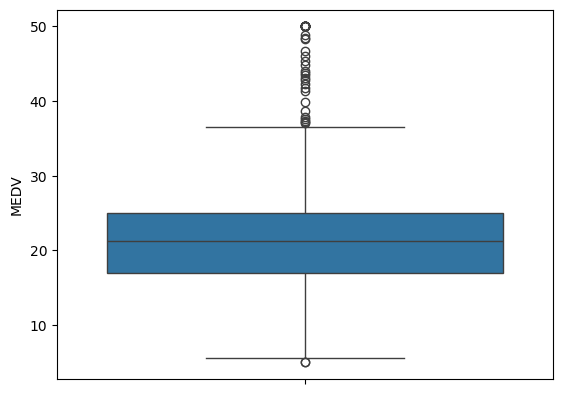

In [12]:
#Task 2: Generate Descriptive Statistics and Visualisations
#2.1
ax = sns.boxplot(y='MEDV', data=boston_df)
print("The MEDV is around the value of 24, which is the centre of the boxplot. But there is a lot of data after the third quartile, showing the presence of some higher-valued properties in the data.")

This is a bar plot of every unique value from the Charles river variable


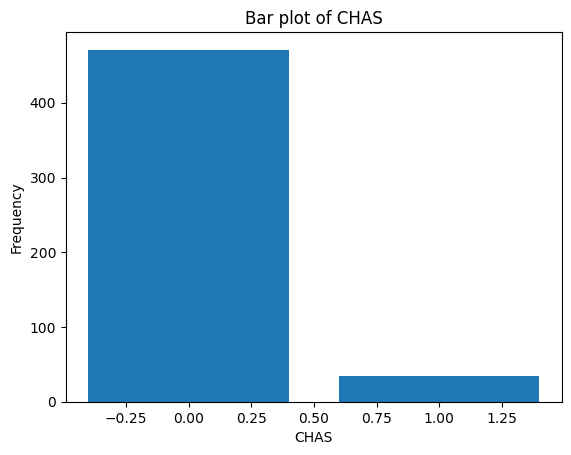

In [13]:
#Task 2: Generate Descriptive Statistics and Visualisations
#2.2
unique_values, counts = np.unique(boston_df['CHAS'], return_counts=True)

pyplot.bar(unique_values,counts)
pyplot.title('Bar plot of CHAS')
pyplot.xlabel('CHAS')
pyplot.ylabel('Frequency')

print("This is a bar plot of every unique value from the Charles river variable")

The median value of owners-occupied homes decreases as the age increases.


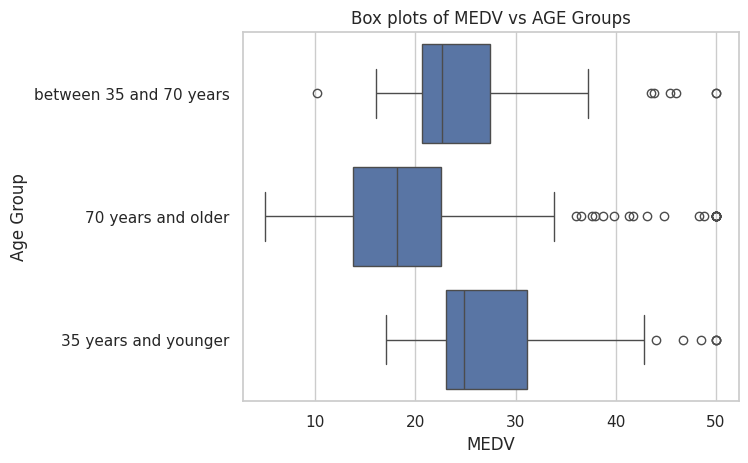

In [14]:
#Task 2: Generate Descriptive Statistics and Visualisations
#2.3
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

sns.set(style="whitegrid")
sns.boxplot(x='MEDV', y="age_group", data=boston_df)
#pyplot.figure(figsize=(10,6))
pyplot.title('Box plots of MEDV vs AGE Groups')
pyplot.ylabel('Age Group')

print("The median value of owners-occupied homes decreases as the age increases.")

Conclusion: there is a positive correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town 


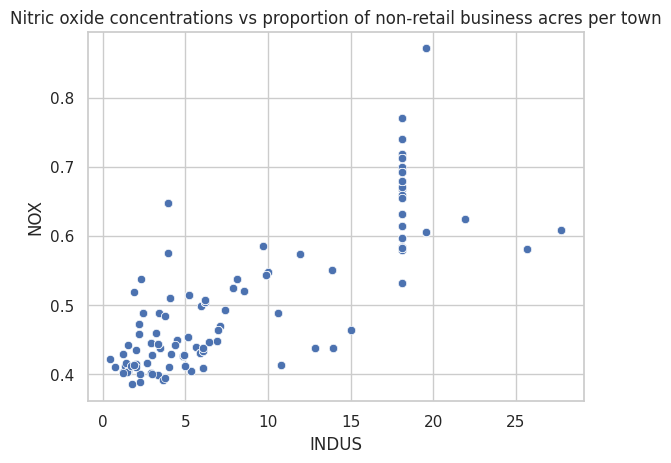

In [15]:
#Task 2: Generate Descriptive Statistics and Visualisations
#2.4
ax = sns.scatterplot(y='NOX', x='INDUS', data=boston_df)

ax.set_title('Nitric oxide concentrations vs proportion of non-retail business acres per town')
print("Conclusion: there is a positive correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town ")

The highest PTRATIO is around 20.


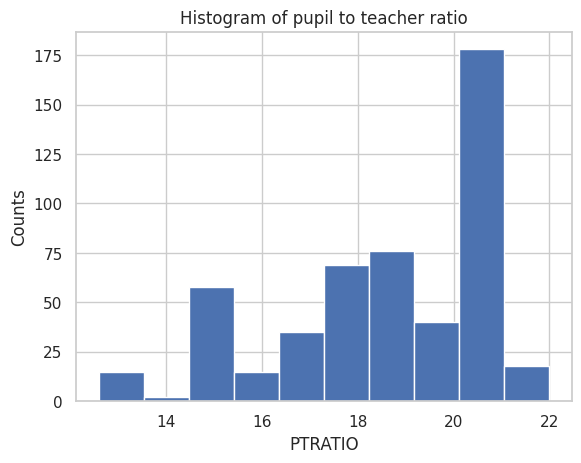

In [16]:
#Task 2: Generate Descriptive Statistics and Visualisations
#2.5
pyplot.hist(boston_df['PTRATIO'])
pyplot.title('Histogram of pupil to teacher ratio')
pyplot.xlabel('PTRATIO')
pyplot.ylabel('Counts')

print("The highest PTRATIO is around 20.")

In [17]:
alpha = 0.05

In [19]:
#Task 3: Use the appropriate tests to answer the questions provided.
#3.1 Is there a significant difference in median value of houses bounded by the Charles river or not?
print("Null Hypothesis: There is no significant difference in median value of houses bounded by the Charles river")
print('Alternative Hypothesis:  There is a significant difference in median value of houses bounded by the Charles river')

Null Hypothesis: There is no significant difference in median value of houses bounded by the Charles river
Alternative Hypothesis:  There is a significant difference in median value of houses bounded by the Charles river


In [25]:
ttest_stat, p_val=scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] ==  1]['MEDV'], equal_var = True)
if p_val < alpha:
    print("Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is no statistical difference median value of houses bounded by the Charles river")
else:
    print("Conclusion: Since the p-value is less than alpha value 0.05, we fail to reject the null hypothesis as there isn't enough proof that there is no statistical difference median value of houses bounded by the Charles river")

Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is no statistical difference median value of houses bounded by the Charles river


In [29]:
##Task 3: Use the appropriate tests to answer the questions provided.
#3.2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)print("Null Hypothesis: There isn't a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940")
print("Null Hypothesis: There isn't a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940")
print("Alternative Hypothesis: There is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940")

Null Hypothesis: There isn't a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940
Alternative Hypothesis: There is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940


In [30]:
thrityfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

f_stat, p_val=f_statistic, p_value = scipy.stats.f_oneway(thrityfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

if p_val < alpha:
        print("Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference median value of houses for each proportion of owner occupied units built prior to 1940")
else:
            print("Conclusion: Since the p-value is less than alpha value 0.05, we fail to reject the null hypothesis as there isn't enough proof that there is a statistical difference median value of houses for each proportion of owner occupied units built prior to 1940")

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15
Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference median value of houses for each proportion of owner occupied units built prior to 1940


In [31]:
##Task 3: Use the appropriate tests to answer the questions provided.
#3.3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?
print("Null Hypothesis: there isn't a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town")
print("Alternative Hypothesis: there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town")

Null Hypothesis: there isn't a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
Alternative Hypothesis: there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town


In [32]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [33]:
stat, p_val = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
if p_val < alpha:
    print("Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis and conclude that there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town")
else:
    print("Conclusion: Since the p-value is less than alpha value 0.05, we fail to reject the null hypothesis and conclude that there isn't a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town")

Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis and conclude that there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town


In [35]:
##Task 3: Use the appropriate tests to answer the questions provided.
#3.4 What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes
print("Null Hypothesis: there isn't an impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes")
print("Alternative Hypothesis: there is impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes")

Null Hypothesis: there isn't an impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes
Alternative Hypothesis: there is impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes


In [36]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 21 Dec 2024   Prob (F-statistic):           1.21e-08
Time:                        13:00:38   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
p_val = 1.21e-8
if p_val < alpha:
    print("Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is evidence that there is impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes")
else:
    print("Conclusion: Since the p-value is greater than alpha value 0.05, we fail to reject the null hypothesis as there isn't enough evidence that there is impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes")

Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is evidence that there is impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes
